In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('/content/3차전처리.xlsx')

In [2]:
data_nan = data.replace(' ', np.nan)
data_nan.isnull().sum()

pid              0
emp0602        729
gender           0
aage06         729
a060405        729
school0603     729
a060710        729
grade0602      729
ca063101      2995
ca063102      2995
ca063103      2995
ca063104      2995
ca063105      2995
ca063106      2995
ca063107      2995
ca063108      2995
ca063110      2995
ca063111      2995
ca063112      2995
ca063113      2995
ca063114      2995
ca063301      2995
ca063302      2995
ca063303      2995
ca063304      2995
ca063305      2995
ca063306      2995
ca064511      2995
ab060123      2596
dtype: int64

In [3]:
# 결측치 제거

data_cleaned = data_nan.dropna(subset=['emp0602'])

data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned['emp0602'] == 2.0].index)

# 결측치 제거

data_cleaned = data_cleaned.dropna(subset=['ca063101'])
data_cleaned = data_cleaned.dropna(subset=['ab060123'])

data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned['ab060123'] == 999.0].index)
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned['ca063301'] == 9.0].index)
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned['ca063302'] == 9.0].index)
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned['ca063303'] == 9.0].index)
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned['ca063304'] == 9.0].index)
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned['ca063305'] == 9.0].index)
data_cleaned.isnull().sum()

pid           0
emp0602       0
gender        0
aage06        0
a060405       0
school0603    0
a060710       0
grade0602     0
ca063101      0
ca063102      0
ca063103      0
ca063104      0
ca063105      0
ca063106      0
ca063107      0
ca063108      0
ca063110      0
ca063111      0
ca063112      0
ca063113      0
ca063114      0
ca063301      0
ca063302      0
ca063303      0
ca063304      0
ca063305      0
ca063306      0
ca064511      0
ab060123      0
dtype: int64

In [4]:
# 직업코드 분류
job_code = pd.DataFrame()
job_code['job_code'] = data_cleaned.pop('ab060123')

In [5]:
# 장애코드 분류
code = pd.DataFrame()
code['acode'] = data_cleaned.pop('a060710')

In [6]:
# 직업코드 인코딩
a_encoded_data = pd.get_dummies(code['acode'])


# 직업코드 컬럼 이름 변경
new_column_names = {column: f"code{column}" for column in a_encoded_data.columns}
a_encoded_data = a_encoded_data.rename(columns=new_column_names)

# 결과 출력
print(a_encoded_data)

      code1.0  code2.0  code3.0  code4.0  code5.0  code6.0  code7.0  code8.0  \
3           0        0        0        1        0        0        0        0   
21          1        0        0        0        0        0        0        0   
22          0        0        1        0        0        0        0        0   
23          0        0        0        1        0        0        0        0   
27          0        0        1        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4565        1        0        0        0        0        0        0        0   
4570        0        0        0        1        0        0        0        0   
4571        0        0        0        0        0        0        0        0   
4572        1        0        0        0        0        0        0        0   
4575        0        0        0        0        0        1        0        0   

      code9.0  code10.0  code11.0  code

In [7]:
# 만족도 데이터 분류
df = data_cleaned.loc[:,'ca063301':'ca064511']
satisfaction = pd.DataFrame()
satisfaction['satisfaction'] = df.sum(axis=1)
satisfaction

,satisfaction
3,34.0
21,29.0
22,28.0
23,26.0
27,25.0
...,...
4565,23.0
4570,21.0
4571,21.0
4572,16.0


In [8]:
# # 만족도 데이터 이분화
# satisfaction.loc[satisfaction['satisfaction'] <= 28, 'satisfaction'] = 0
# satisfaction.loc[satisfaction['satisfaction'] > 28, 'satisfaction'] = 1

# satisfaction['satisfaction']
# satisfaction

In [9]:
# 직업만족도 3등분
satisfaction.loc[satisfaction['satisfaction'] <= 16, 'satisfaction'] = 0
satisfaction.loc[(satisfaction['satisfaction'] > 16) & (satisfaction['satisfaction'] <= 28), 'satisfaction'] = 1
satisfaction.loc[(satisfaction['satisfaction'] > 28) & (satisfaction['satisfaction'] <= 35), 'satisfaction'] = 2


In [10]:
satisfaction = pd.get_dummies(satisfaction['satisfaction'])
satisfaction

# 이름 재정의

new_column_names = {column: f"satisfaction{column}" for column in satisfaction.columns}
bencoded_data = satisfaction.rename(columns=new_column_names)
bencoded_data

,satisfaction0.0,satisfaction1.0,satisfaction2.0
3,0,0,1
21,0,0,1
22,0,1,0
23,0,1,0
27,0,1,0
...,...,...,...
4565,0,1,0
4570,0,1,0
4571,0,1,0
4572,1,0,0


In [11]:
# 코드 인코딩
encoded_data = pd.get_dummies(job_code['job_code'])
encoded_data

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
3,0,0,1,0,0,0,0,0,0
21,0,0,0,0,1,0,0,0,0
22,0,1,0,0,0,0,0,0,0
23,0,0,1,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4565,0,0,0,1,0,0,0,0,0
4570,0,0,0,0,0,0,1,0,0
4571,0,0,1,0,0,0,0,0,0
4572,0,0,0,0,1,0,0,0,0


In [12]:
# 직업코드 컬럼 이름 변경
new_column_names = {column: f"jodcode{column}" for column in encoded_data.columns}
encoded_data = encoded_data.rename(columns=new_column_names)

# 결과 출력
print(encoded_data)

      jodcode1.0  jodcode2.0  jodcode3.0  jodcode4.0  jodcode5.0  jodcode6.0  \
3              0           0           1           0           0           0   
21             0           0           0           0           1           0   
22             0           1           0           0           0           0   
23             0           0           1           0           0           0   
27             0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4565           0           0           0           1           0           0   
4570           0           0           0           0           0           0   
4571           0           0           1           0           0           0   
4572           0           0           0           0           1           0   
4575           0           0           0           0           0           0   

      jodcode7.0  jodcode8.0  jodcode9.

In [13]:
data_cleaned.drop('ca063301', axis=1, inplace=True)
data_cleaned.drop('ca063302', axis=1, inplace=True)
data_cleaned.drop('ca063303', axis=1, inplace=True)
data_cleaned.drop('ca063304', axis=1, inplace=True)
data_cleaned.drop('ca063305', axis=1, inplace=True)
data_cleaned.drop('ca063306', axis=1, inplace=True)
data_cleaned.drop('ca064511', axis=1, inplace=True)



In [14]:
a_encoded_data

,code1.0,code2.0,code3.0,code4.0,code5.0,code6.0,code7.0,code8.0,code9.0,code10.0,code11.0,code12.0,code13.0,code14.0,code15.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4571,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# 원핫인코딩한 컬럼 결합

combined_data = pd.concat([data_cleaned, a_encoded_data], axis=1)
combined_data = pd.concat([combined_data,encoded_data], axis=1)
combined_data

,pid,emp0602,gender,aage06,a060405,school0603,grade0602,ca063101,ca063102,ca063103,...,code15.0,jodcode1.0,jodcode2.0,jodcode3.0,jodcode4.0,jodcode5.0,jodcode6.0,jodcode7.0,jodcode8.0,jodcode9.0
3,16471,1.0,2,3.0,2.0,3.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
21,32584,1.0,1,3.0,3.0,3.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
22,32608,1.0,1,2.0,2.0,3.0,2.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
23,32627,1.0,1,2.0,3.0,3.0,3.0,2.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,0
27,39034,1.0,1,2.0,1.0,2.0,2.0,3.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,2487815,1.0,1,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4570,2487943,1.0,1,3.0,1.0,3.0,2.0,2.0,2.0,2.0,...,0,0,0,0,0,0,0,1,0,0
4571,2487959,1.0,1,3.0,1.0,3.0,2.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
4572,2487992,1.0,2,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
combined_data = combined_data.drop('a060405', axis=1)
combined_data

,pid,emp0602,gender,aage06,school0603,grade0602,ca063101,ca063102,ca063103,ca063104,...,code15.0,jodcode1.0,jodcode2.0,jodcode3.0,jodcode4.0,jodcode5.0,jodcode6.0,jodcode7.0,jodcode8.0,jodcode9.0
3,16471,1.0,2,3.0,3.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
21,32584,1.0,1,3.0,3.0,2.0,1.0,1.0,1.0,2.0,...,0,0,0,0,0,1,0,0,0,0
22,32608,1.0,1,2.0,3.0,2.0,1.0,1.0,1.0,2.0,...,0,0,1,0,0,0,0,0,0,0
23,32627,1.0,1,2.0,3.0,3.0,2.0,2.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,0
27,39034,1.0,1,2.0,2.0,2.0,3.0,3.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,2487815,1.0,1,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4570,2487943,1.0,1,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,0,0,0,0,0,0,0,1,0,0
4571,2487959,1.0,1,3.0,3.0,2.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
4572,2487992,1.0,2,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
X = combined_data.loc[:,'gender':'jodcode9.0']
y = bencoded_data.loc[:,'satisfaction0.0':'satisfaction2.0']
X

,gender,aage06,school0603,grade0602,ca063101,ca063102,ca063103,ca063104,ca063105,ca063106,...,code15.0,jodcode1.0,jodcode2.0,jodcode3.0,jodcode4.0,jodcode5.0,jodcode6.0,jodcode7.0,jodcode8.0,jodcode9.0
3,2,3.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,...,0,0,0,1,0,0,0,0,0,0
21,1,3.0,3.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
22,1,2.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,...,0,0,1,0,0,0,0,0,0,0
23,1,2.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
27,1,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,1,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4570,1,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4571,1,3.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,...,0,0,0,1,0,0,0,0,0,0
4572,2,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
# # 데이터프레임에서 'satisfaction0.0' 열과 'satisfaction1.0' 열의 값을 카운트
# count_0 = y['satisfaction0.0'].sum()
# count_1 = y['satisfaction1.0'].sum()
# count_2 = y['satisfaction2.0'].sum()
# # 결과 출력
# print("Count of 0:", count_0)
# print("Count of 1:", count_1)
# print("Count of 2:", count_2)

X.loc[:,"jodcode1.0":"jodcode9.0"]

,jodcode1.0,jodcode2.0,jodcode3.0,jodcode4.0,jodcode5.0,jodcode6.0,jodcode7.0,jodcode8.0,jodcode9.0
3,0,0,1,0,0,0,0,0,0
21,0,0,0,0,1,0,0,0,0
22,0,1,0,0,0,0,0,0,0
23,0,0,1,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4565,0,0,0,1,0,0,0,0,0
4570,0,0,0,0,0,0,1,0,0
4571,0,0,1,0,0,0,0,0,0
4572,0,0,0,0,1,0,0,0,0


In [19]:
# 학습, 테스트 데이터셋 분할

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)


In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1002, 41)
(1002, 3)
(430, 41)
(430, 3)


In [21]:
# pd.set_option('display.max_columns', None)  # 모든 열 표시
# pd.set_option('display.max_rows', None)  # 모든 행 표시
# X

In [22]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import os

model_dir = '/content/drive/MyDrive/model/'

if not os.path.exists(model_dir):
  os.mkdir(model_dir)


model_checkpoint = '/content/drive/MyDrive/model/best_model.h5'
checkpoint = ModelCheckpoint(model_checkpoint, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 3 to 4575
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      1432 non-null   int64  
 1   aage06      1432 non-null   float64
 2   school0603  1432 non-null   float64
 3   grade0602   1432 non-null   float64
 4   ca063101    1432 non-null   float64
 5   ca063102    1432 non-null   float64
 6   ca063103    1432 non-null   float64
 7   ca063104    1432 non-null   float64
 8   ca063105    1432 non-null   float64
 9   ca063106    1432 non-null   float64
 10  ca063107    1432 non-null   float64
 11  ca063108    1432 non-null   float64
 12  ca063110    1432 non-null   float64
 13  ca063111    1432 non-null   float64
 14  ca063112    1432 non-null   float64
 15  ca063113    1432 non-null   float64
 16  ca063114    1432 non-null   float64
 17  code1.0     1432 non-null   uint8  
 18  code2.0     1432 non-null   uint8  
 19  code3.0     1432 non-null  

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 모델 구성
model = Sequential()
model.add(Dense(126, activation='relu', input_dim=41))
#model.add(Dense(64, activation='relu'))
model.add(Dropout(0.8))  # 드롭아웃 추가
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 정규화 추가
#model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_test, y_test), callbacks=[checkpoint])


In [25]:
# # 상관관계 계산
# import seaborn as sns
# import matplotlib.pyplot as plt


# correlation_matrix = combined_data.corr()



# # 히트맵 그리기
# plt.figure(figsize=(50, 34))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# # 그래프 제목 설정
# plt.title('Correlation Heatmap')

# # 그래프 출력
# plt.show()


In [39]:
result1, result2 = model.evaluate(X_test, y_test)

print("loss 값:", result1)
print("accuracy 값:", result2)


14/14 [==============================] - 0s 2ms/step - loss: 0.5294 - accuracy: 0.8116
loss 값: 0.5294121503829956
accuracy 값: 0.8116279244422913


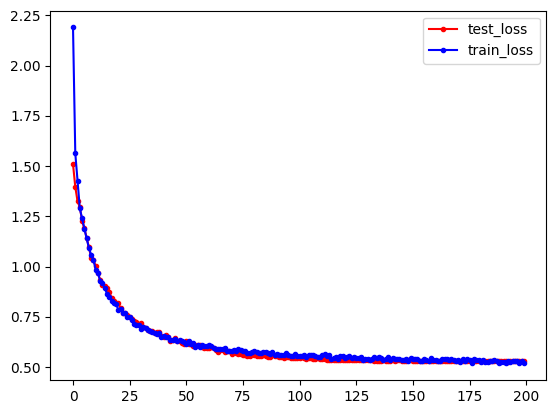

In [35]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_loss')
plt.legend()

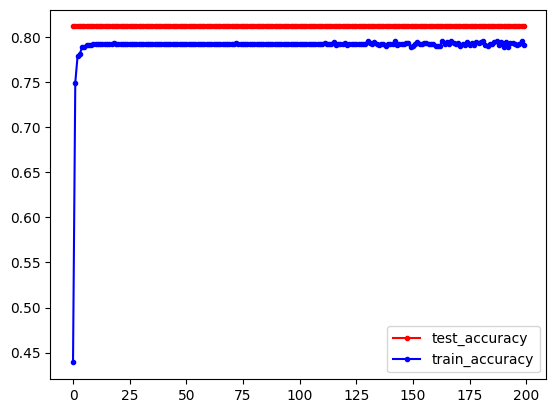

In [36]:
y_vloss = history.history['val_accuracy']
y_loss = history.history['accuracy']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='test_accuracy')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_accuracy')

plt.legend()

In [29]:
# import shutil

# # 삭제할 폴더 경로
# folder_path = '/content/model'

# # 폴더 삭제
# shutil.rmtree(folder_path)

In [30]:
predictions = model.predict(X_test)
print(predictions[0])

14/14 [==============================] - 0s 1ms/step
[0.00786401 0.82779115 0.16434476]


In [31]:
predictions = model.predict(X_test)
# print(predictions[0])
print(predictions[1][2])

for i in range(0, len(predictions)):
   print(predictions[i])

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

y_pred = np.argmax(predictions, axis=1)  # 확률 예측값에서 가장 높은 확률에 해당하는 클래스 선택


# 예측 결과에 따라 동작 수행
if y_pred[0] == 1:
    print("Positive prediction!")
else:
    print("Negative prediction!")


14/14 [==============================] - 0s 1ms/step
0.12249655
[0.00786401 0.82779115 0.16434476]
[0.01535551 0.8621479  0.12249655]
[0.00627156 0.57468414 0.41904432]
[0.0078756  0.66345584 0.32866856]
[0.02047726 0.88721853 0.09230422]
[0.02321926 0.8644085  0.11237229]
[0.01879148 0.82810587 0.15310268]
[0.00768907 0.55503917 0.4372718 ]
[0.01169901 0.7023921  0.2859089 ]
[0.00949324 0.87674236 0.11376435]
[0.02056428 0.8244483  0.15498745]
[0.02135423 0.7859467  0.1926991 ]
[0.01534833 0.9282029  0.05644869]
[0.01931426 0.8685009  0.11218486]
[0.00698971 0.9111483  0.08186196]
[0.01038473 0.7633567  0.2262586 ]
[0.02543284 0.8726901  0.10187698]
[0.01041447 0.8511953  0.1383902 ]
[0.00975422 0.89047533 0.0997705 ]
[0.01130767 0.8683548  0.12033746]
[0.01531592 0.8779978  0.10668629]
[0.00826853 0.69392645 0.29780504]
[0.00628793 0.8691396  0.12457246]
[0.00766887 0.6652599  0.32707122]
[0.01847116 0.7502405  0.23128831]
[0.01120316 0.85727525 0.13152155]
[0.00784467 0.7607108  0.2

In [32]:
df = X_test.head(1)

In [33]:
print(predictions[1])



[0.01535551 0.8621479  0.12249655]
